# Energy Consumption Prediction Dataset

## 1. Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

In [60]:
df=pd.read_csv("energy_data.csv")

In [61]:
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
158,Residential,11182,13,45,12.11,Weekend,3028.56
718,Commercial,48788,53,11,31.31,Weekend,5032.83
503,Residential,32390,84,15,27.44,Weekday,4172.29
583,Residential,32847,34,35,19.28,Weekend,4085.95
429,Industrial,40863,47,1,17.61,Weekend,4945.09


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [63]:
df["Building Type"].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [64]:
df["Day of Week"].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

In [65]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [66]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [67]:
df.duplicated().sum()

0

## 3. Exploratory Data Analysis (EDA)

#### histogram of energy consumption

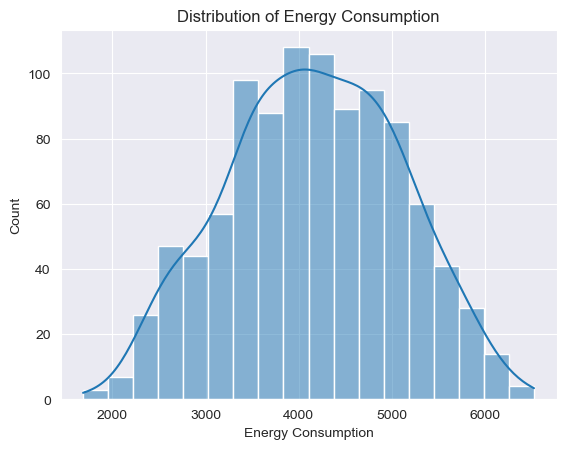

In [68]:
sns.histplot(data=df,x="Energy Consumption",kde=True)
plt.title("Distribution of Energy Consumption")
plt.show()

#### Average energy consumption by building type

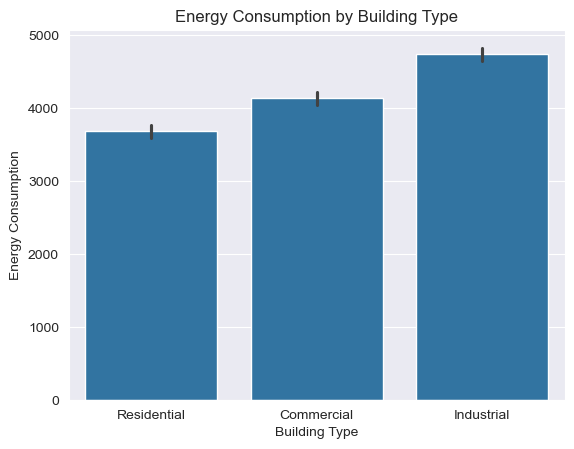

In [69]:
sns.barplot(data=df,x="Building Type",y="Energy Consumption")
plt.title("Energy Consumption by Building Type")
plt.show()

#### Number of occupants vs energy consumption

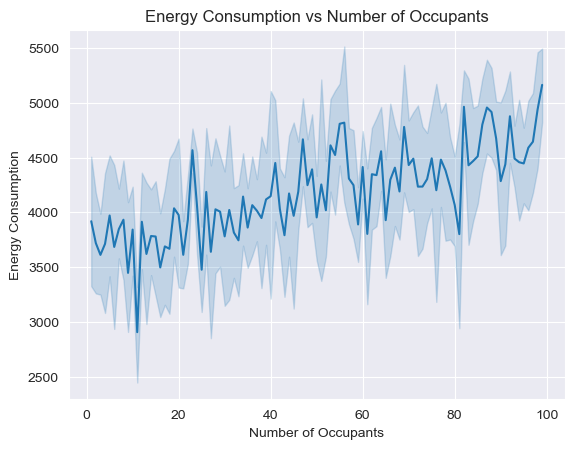

In [70]:
sns.lineplot(data=df,x="Number of Occupants",y="Energy Consumption")
plt.title("Energy Consumption vs Number of Occupants")
plt.show()

#### Energy consumption by area

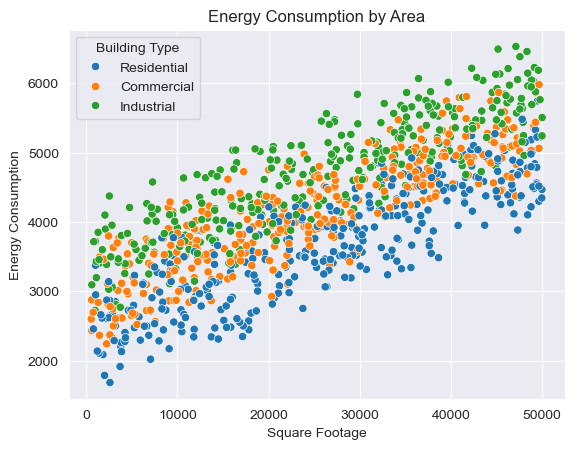

In [71]:
sns.scatterplot(data=df,x="Square Footage",y="Energy Consumption",hue="Building Type")
plt.title("Energy Consumption by Area")
plt.show()

#### boxplot of energy consumption by building type

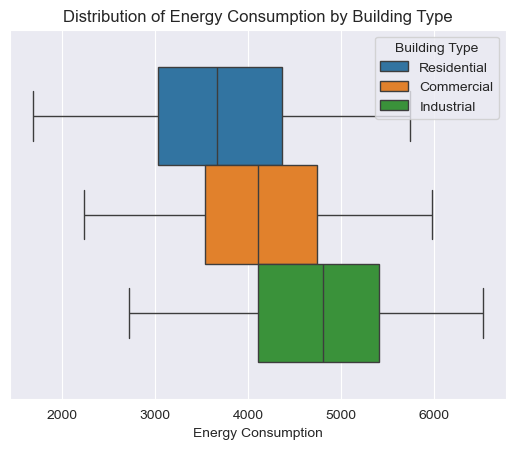

In [72]:
sns.boxplot(data=df,x="Energy Consumption",hue="Building Type")
plt.title("Distribution of Energy Consumption by Building Type")
plt.show()

#### Appliances vs energy consumption

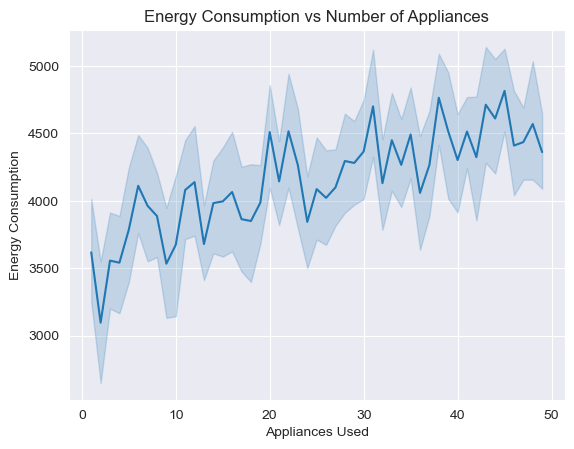

In [73]:
sns.lineplot(data=df,x="Appliances Used",y="Energy Consumption")
plt.title("Energy Consumption vs Number of Appliances")
plt.show()

#### Energy consumption for each building type by day of week

In [74]:
df.groupby(["Day of Week", "Building Type"])["Energy Consumption"].mean()


Day of Week  Building Type
Weekday      Commercial       4116.690479
             Industrial       4747.906624
             Residential      3723.662022
Weekend      Commercial       4143.198876
             Industrial       4722.617938
             Residential      3634.721280
Name: Energy Consumption, dtype: float64